# Attatched are my portfolio inputs pulled from Alpacas API
## VTI represents the Vanguard Total Market Index Fund

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

#### Below are real market data inputs to run basic analysis

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2017-7-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-14", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["MSFT", "GOOG", "ADP", "AMZN", "BX", "BRK.B", "VTI", "SHOP"]

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.tail()

ADP                                        \
                             open     high       low   close     volume   
time                                                                      
2021-07-08 00:00:00-04:00  201.94  203.090  200.7500  201.90   951742.0   
2021-07-09 00:00:00-04:00  202.00  203.970  201.8313  203.66   731356.0   
2021-07-12 00:00:00-04:00  202.50  203.940  200.9100  203.75   901095.0   
2021-07-13 00:00:00-04:00  203.67  204.835  203.3100  203.91   820719.0   
2021-07-14 00:00:00-04:00  204.49  205.410  203.9200  204.51  1062605.0   

                              AMZN                                   \
                              open       high        low      close   
time                                                                  
2021-07-08 00:00:00-04:00  3643.99  3759.9856  3621.1200  3731.4200   
2021-07-09 00:00:00-04:00  3723.88  3748.0000  3693.3967  3717.6802   
2021-07-12 00:00:00-04:00  3743.50  3757.2898  3696.7930  3718.5200   
2021-07-13 00:00:00-04:00  3702.95  3773.0781  3671.3200  3678.8500   
2021-07-14 00:00:00-04:00  3709.91  3717.6600  3660.8267  3683.6100   

                                      ...     SHOP                        \
                              volume  ...     open       high        low   
time                                  ...                                  
2021-07-08 00:00:00-04:00  4779980.0  ...  1481.00  1499.5000  1452.3200   
2021-07-09 00:00:00-04:00  3444757.0  ...  1468.64  1496.9200  1457.8801   
2021-07-12 00:00:00-04:00  2174155.0  ...  1502.93  1530.1800  1476.0000   
2021-07-13 00:00:00-04:00  3638087.0  ...  1492.59  1532.2704  1490.7400   
2021-07-14 00:00:00-04:00  2975117.0  ...  1537.21  1550.0000  1459.0000   

                                                    VTI                    \
                               close     volume    open      high     low   
time                                                                        
2021-07-08 00:00:00-04:00  1462.4100  1597341.0  221.93  223.7196  221.14   
2021-07-09 00:00:00-04:00  1494.9900  1217446.0  224.16  225.9800  224.02   
2021-07-12 00:00:00-04:00  1494.9299  1097215.0  225.95  226.6100  225.47   
2021-07-13 00:00:00-04:00  1516.5100  1149440.0  226.10  226.5200  225.12   
2021-07-14 00:00:00-04:00  1462.9800  1416678.0  226.27  226.4550  224.42   

                                              
                            close     volume  
time                                          
2021-07-08 00:00:00-04:00  223.17  4341291.0  
2021-07-09 00:00:00-04:00  225.87  3773765.0  
2021-07-12 00:00:00-04:00  226.48  3181860.0  
2021-07-13 00:00:00-04:00  225.27  4082658.0  
2021-07-14 00:00:00-04:00  224.92  2743411.0  

[5 rows x 40 columns]

#### Cleaned DataFrame 

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.tail() 

,MSFT,GOOG,ADP,AMZN,BX,BRK.B,VTI,SHOP
2021-07-08,277.53,2583.55,201.90,3731.4200,98.27,274.22,223.17,1462.4100
2021-07-09,277.92,2590.75,203.66,3717.6802,99.72,280.57,225.87,1494.9900
2021-07-12,277.32,2611.27,203.75,3718.5200,101.93,280.09,226.48,1494.9299
2021-07-13,280.98,2619.89,203.91,3678.8500,99.83,279.35,225.27,1516.5100
2021-07-14,282.51,2641.65,204.51,3683.6100,98.65,278.56,224.92,1462.9800


#### Percent Changes of Each Portfolio

In [7]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.tail()

,MSFT,GOOG,ADP,AMZN,BX,BRK.B,VTI,SHOP
2021-07-08,-0.008821,-0.006953,-0.007131,0.008904,-0.005867,-0.018118,-0.008486,-0.037654
2021-07-09,0.001405,0.002787,0.008717,-0.003682,0.014755,0.023157,0.012098,0.022278
2021-07-12,-0.002159,0.007920,0.000442,0.000226,0.022162,-0.001711,0.002701,-0.000040
2021-07-13,0.013198,0.003301,0.000785,-0.010668,-0.020602,-0.002642,-0.005343,0.014436
2021-07-14,0.005445,0.008306,0.002942,0.001294,-0.011820,-0.002828,-0.001554,-0.035298


#### Chart the Cumulative Returns for Each Portfolio

<AxesSubplot:>

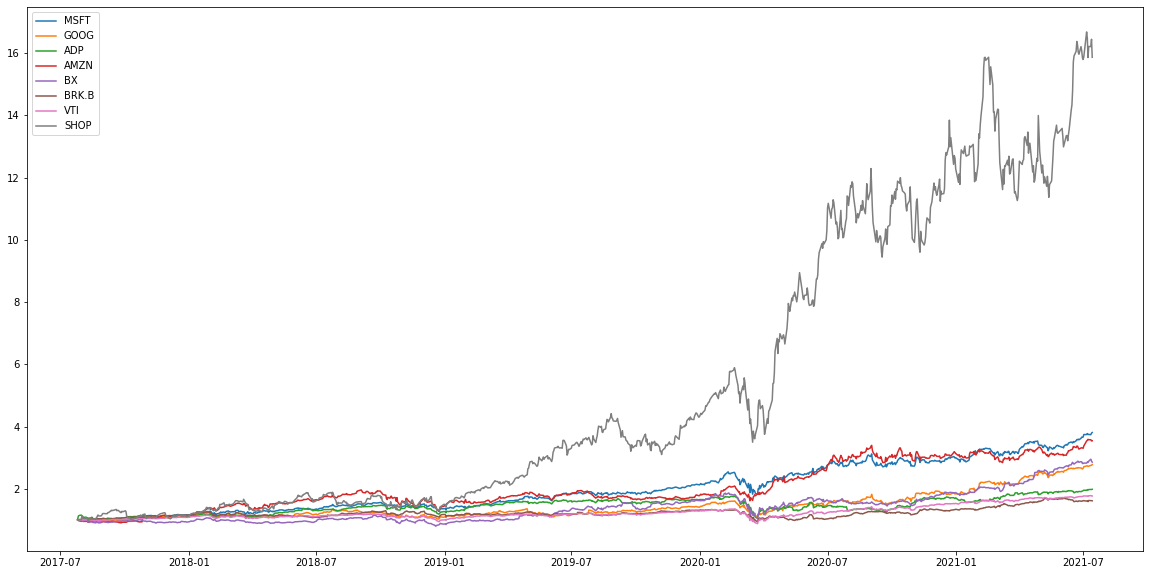

In [8]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+df_daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

In [9]:
# Standard Deviation 
df_daily_returns_std = df_daily_returns.std()
df_daily_returns_std.sort_values()

VTI      0.013204
BRK.B    0.014790
GOOG     0.018150
ADP      0.018158
MSFT     0.018714
AMZN     0.019865
BX       0.021071
SHOP     0.034355
dtype: float64

#### Below are the Beta Calculations for Each Portfolio

In [10]:
# Calculate covariance of a single portfolio
MSFT_cov= df_daily_returns["MSFT"].cov(df_daily_returns["VTI"])
GOOG_cov =  df_daily_returns["GOOG"].cov(df_daily_returns["VTI"])
ADP_cov = df_daily_returns["ADP"].cov(df_daily_returns["VTI"])
AMZN_cov =  df_daily_returns["AMZN"].cov(df_daily_returns["VTI"])
BX_cov =  df_daily_returns["BX"].cov(df_daily_returns["VTI"])
BRK_cov =  df_daily_returns["BRK.B"].cov(df_daily_returns["VTI"])
SHOP_cov =  df_daily_returns["SHOP"].cov(df_daily_returns["VTI"])

variance = df_daily_returns["VTI"].var()

MSFT_beta = MSFT_cov / variance
GOOG_beta = GOOG_cov / variance
ADP_beta = ADP_cov / variance
AMZN_beta = AMZN_cov / variance
BX_beta = BX_cov / variance
BRK_beta = BRK_cov / variance
SHOP_beta = SHOP_cov / variance


print(f"MSFT Beta {MSFT_beta}")
print(f"GOOG Beta {GOOG_beta}")
print(f"ADP Beta {ADP_beta}")
print(f"AMZN Beta {AMZN_beta}")
print(f"BX Beta {BX_beta}")
print(f"BRK Beta {BRK_beta}")
print(f"SHOP Beta {SHOP_beta}")

MSFT Beta 1.1753330245712847
GOOG Beta 1.0609912866431854
ADP Beta 1.069703620316374
AMZN Beta 0.9109556052632605
BX Beta 1.2174022689546098
BRK Beta 0.9251701297251973
SHOP Beta 1.3087996404894957


#### Annualized Sharpe Ratio Calculations to Determine Risk/Reward for Each Stock

In [11]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_daily_returns.mean() * 252) / (df_daily_returns.std()* np.sqrt(252))
sharpe_ratios.sort_values()

BRK.B    0.629502
ADP      0.743674
VTI      0.789946
BX       0.959226
GOOG     1.039298
AMZN     1.169077
MSFT     1.284447
SHOP     1.553483
dtype: float64

In [12]:
my_portfolio = df_daily_returns.drop(columns =['VTI'])

In [13]:
my_portfolio

,MSFT,GOOG,ADP,AMZN,BX,BRK.B,SHOP
2017-07-26,-0.002008,-0.002998,0.027134,0.012566,-0.002170,0.000463,0.018766
2017-07-27,-0.012154,-0.014465,0.091046,-0.007805,-0.021745,-0.000173,-0.037053
2017-07-28,-0.001640,0.007933,0.015133,-0.023895,-0.010522,0.005606,0.028085
2017-07-31,-0.004245,-0.011683,0.014226,-0.031872,0.002247,0.006207,-0.006023
2017-08-01,-0.002338,0.000355,-0.018898,0.008800,0.000897,0.006969,0.126163
...,...,...,...,...,...,...,...
2021-07-08,-0.008821,-0.006953,-0.007131,0.008904,-0.005867,-0.018118,-0.037654
2021-07-09,0.001405,0.002787,0.008717,-0.003682,0.014755,0.023157,0.022278
2021-07-12,-0.002159,0.007920,0.000442,0.000226,0.022162,-0.001711,-0.000040
2021-07-13,0.013198,0.003301,0.000785,-0.010668,-0.020602,-0.002642,0.014436


#### Below are the portfolio weights that I have chosen for my set portfolio

In [14]:
# Portfolio Weights 
MSFT = 0.25
GOOG = 0.15
ADP = 0.10
AMZN = 0.15
BX = 0.10
BRK = 0.10
SHOP = 0.15

#### Hypothetical Returns for my portfolio with an initial investment of $100,000 since 2017

<AxesSubplot:>

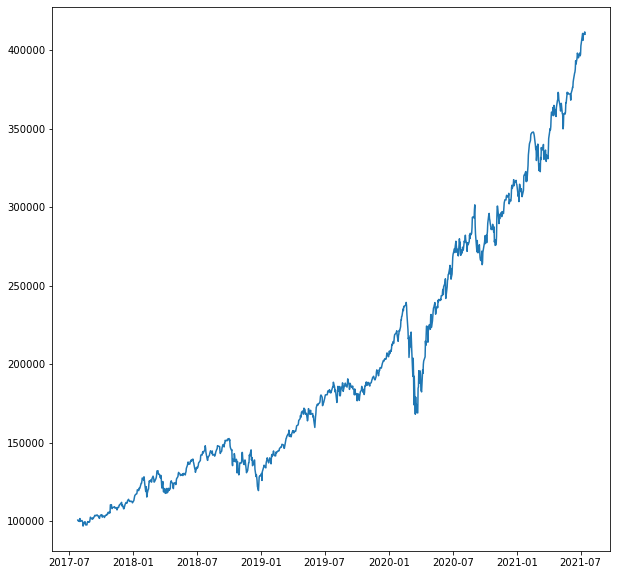

In [15]:
# Set weights
initial_investment = 100000
weights = [MSFT,GOOG,ADP,AMZN,BX,BRK,SHOP]

my_portfolio_returns = my_portfolio.dot(weights)


my_portfolio_cumulative_returns = (1 + my_portfolio_returns).cumprod()
my_portfolio_cumulative_profits = (initial_investment * my_portfolio_cumulative_returns)
my_portfolio_cumulative_profits.plot(figsize = (10,10))



#### Below is the chosen market index

In [16]:
market = df_daily_returns["VTI"]
market = pd.DataFrame(market)

#### Portfolio Beta Calculation

In [17]:
# Calculate covariance of a single portfolio
my_port_cov = my_portfolio_returns.cov(market["VTI"])

variance = market["VTI"].var()

my_portfolio_beta = my_port_cov / variance

print(f"My Portfolio Beta is {my_portfolio_beta}")

My Portfolio Beta is 1.1071728379018306


#### Below is the initial weight of Robert's portfolio levered by my portfolio's Beta

<AxesSubplot:>

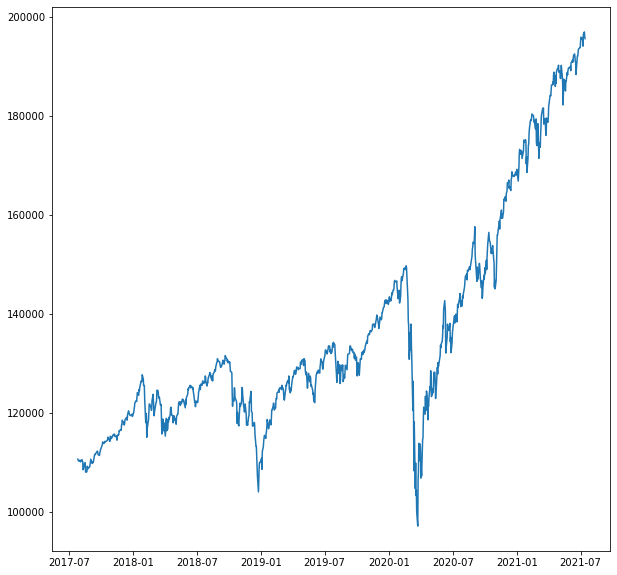

In [18]:
# Set weights
initial_investment = 100000 * (1.1073869564588297)
market_weights = [1]

market_returns = market.dot(market_weights)


market_cumulative_returns = (1 + market_returns).cumprod()
market_cumulative_profits = (initial_investment * market_cumulative_returns)
market_cumulative_profits.plot(figsize = (10,10))

In [19]:
both_portfolios = pd.concat([market_cumulative_profits, my_portfolio_cumulative_profits], axis = 'columns', join = 'inner')

#### Scoreboard at the end of the time period (change the dates to match the time period needs) 

In [20]:
both_portfolios.columns = ['Robert', 'George']
both_portfolios.tail(1)

,Robert,George
2021-07-14,195535.778181,410107.132944


# Monte Carlo Simulation (Just for Fun)
#### Past trends do not indicate future performance

In [21]:
from MCForecastTools1 import MCSimulation

In [22]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-07-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-14", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["MSFT", "GOOG", "ADP", "AMZN", "BX", "BRK.B", "SHOP"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.tail()

ADP                                        \
                             open     high       low   close     volume   
time                                                                      
2021-07-08 00:00:00-04:00  201.94  203.090  200.7500  201.90   951742.0   
2021-07-09 00:00:00-04:00  202.00  203.970  201.8313  203.66   731356.0   
2021-07-12 00:00:00-04:00  202.50  203.940  200.9100  203.75   901095.0   
2021-07-13 00:00:00-04:00  203.67  204.835  203.3100  203.91   820719.0   
2021-07-14 00:00:00-04:00  204.49  205.410  203.9200  204.51  1062605.0   

                              AMZN                                   \
                              open       high        low      close   
time                                                                  
2021-07-08 00:00:00-04:00  3643.99  3759.9856  3621.1200  3731.4200   
2021-07-09 00:00:00-04:00  3723.88  3748.0000  3693.3967  3717.6802   
2021-07-12 00:00:00-04:00  3743.50  3757.2898  3696.7930  3718.5200   
2021-07-13 00:00:00-04:00  3702.95  3773.0781  3671.3200  3678.8500   
2021-07-14 00:00:00-04:00  3709.91  3717.6600  3660.8267  3683.6100   

                                      ...    MSFT                            \
                              volume  ...    open      high     low   close   
time                                  ...                                     
2021-07-08 00:00:00-04:00  4779980.0  ...  276.82  278.7300  274.87  277.53   
2021-07-09 00:00:00-04:00  3444757.0  ...  275.60  278.0500  275.32  277.92   
2021-07-12 00:00:00-04:00  2174155.0  ...  278.94  279.7700  276.58  277.32   
2021-07-13 00:00:00-04:00  3638087.0  ...  277.59  282.8477  277.39  280.98   
2021-07-14 00:00:00-04:00  2975117.0  ...  282.26  283.6600  280.55  282.51   

                                          SHOP                        \
                               volume     open       high        low   
time                                                                   
2021-07-08 00:00:00-04:00  20138896.0  1481.00  1499.5000  1452.3200   
2021-07-09 00:00:00-04:00  19294073.0  1468.64  1496.9200  1457.8801   
2021-07-12 00:00:00-04:00  13358203.0  1502.93  1530.1800  1476.0000   
2021-07-13 00:00:00-04:00  22602039.0  1492.59  1532.2704  1490.7400   
2021-07-14 00:00:00-04:00  19299360.0  1537.21  1550.0000  1459.0000   

                                                 
                               close     volume  
time                                             
2021-07-08 00:00:00-04:00  1462.4100  1597341.0  
2021-07-09 00:00:00-04:00  1494.9900  1217446.0  
2021-07-12 00:00:00-04:00  1494.9299  1097215.0  
2021-07-13 00:00:00-04:00  1516.5100  1149440.0  
2021-07-14 00:00:00-04:00  1462.9800  1416678.0  

[5 rows x 35 columns]

In [23]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [MSFT,GOOG,ADP,AMZN,BX,BRK,SHOP],
    num_simulation = 1000,
    num_trading_days = 252*5
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

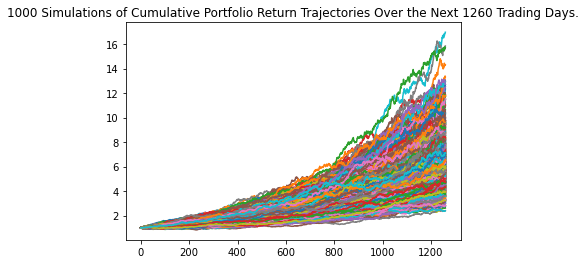

In [24]:
line_plot = MC_even_dist.plot_simulation()

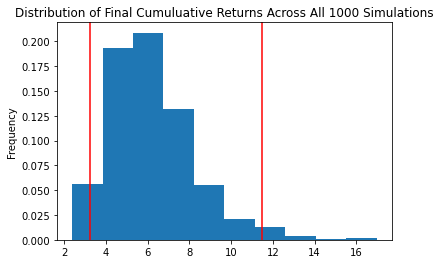

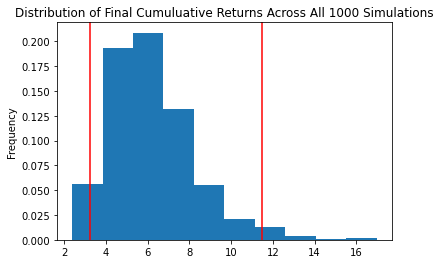

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               6.209042
std                2.024495
min                2.384590
25%                4.765684
50%                5.849009
75%                7.191841
max               16.961359
95% CI Lower       3.245233
95% CI Upper      11.494829
Name: 1260, dtype: float64


In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*100000,2)
ci_upper = round(tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within in the range of $324523.26 and $1149482.89
